You have access to two datasets, available here:
- Payments: Contains merchant-day volume data. Volume is reported for three Stripe products: Subscriptions, Checkout, and Payment Links.
- Merchants: Contains merchant data including signup date, region, company size, and industry.

Stripe provides a suite of payments, financial services, and business operations products, including:
- Subscription: APIs for creating and managing subscriptions, recurring payments, and recurring revenue.
- Checkout: Prebuilt, Stripe hosted checkout page
- Payment Link: No-code payment

{subscriptions, checkout, payment_link}_volume in `payments` represents transaction volume associated with that product. Note that the product usage is not mutually exclusive. For example, a user can use both Checkout and Subscription products for one transaction.

The dataset has future merchant transaction activity from 2041-2042. The data is made up, but you can consider this to be a random sample of future merchants using Stripe. 

Each observation in the `payments`  transaction volume is in cents. 

##Questions
Suppose you are working with the Head of Product to get more existing Stripe users to start using the Subscriptions product. Please develop a quantitative approach which identifies a list of users for a sales or marketing campaign. 

##Column	Description
- date	When the payment was created in our api
- merchant	The unique identifier for Stripe users. Can be joined onto Merchants dataset
- subscription_volume	Payment volume processed through Stripe's subscription product
- checkout_volume	Payment volume processed through Stripe's Checkout product
- payment_link_volume	Payment volume processed through Stripe's Payment Link product
- total_volume	Payment volume processed through ALL products

#Column	Description
-- merchant	The unique identifier for Stripe users
-- industry	The industry that a user is in. E.g., "Food & drink", "Software",etc.
-- first_charge_date	The first charge/payment created by the merchant throught any product
-- country	The country that a user is in. E.g., "US", "AU", "HK", etc.
-- business_size	Segmentation based on company size. E.g., "small", "medium", "large"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titlesize = 24
labelsize = 22
legendsize = 22
xticksize = 18
yticksize = xticksize

plt.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
plt.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = labelsize
plt.rcParams['axes.titlesize'] = titlesize
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
import pandas as pd

# Load the datasets
merchants_df = pd.read_csv('dstakehome_merchants.csv')
payments_df = pd.read_csv('dstakehome_payments - dstakehome_payments.csv.csv')

# Remove rows with invalid first_charge_date
merchants_df = merchants_df[merchants_df['first_charge_date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).notna()]

# Convert first_charge_date to datetime format
merchants_df['first_charge_date'] = pd.to_datetime(merchants_df['first_charge_date'])

# Convert transaction volumes from cents to dollars
payments_df['subscription_volume'] = payments_df['subscription_volume'] / 100
payments_df['checkout_volume'] = payments_df['checkout_volume'] / 100
payments_df['payment_link_volume'] = payments_df['payment_link_volume'] / 100
payments_df['total_volume'] = payments_df['total_volume'] / 100

# Verify the changes
print(merchants_df.info())
print(payments_df.info())
print(merchants_df.head())
print(payments_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 23601 entries, 0 to 23626
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   merchant           23601 non-null  object             
 1   industry           23601 non-null  object             
 2   first_charge_date  23601 non-null  datetime64[ns, UTC]
 3   country            23601 non-null  object             
 4   business_size      23601 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577887 entries, 0 to 1577886
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   date                 1577887 non-null  object 
 1   merchant             1577887 non-null  object 
 2   subscription_volume  1577887 non-null  float64
 3   checkout_volume      1577887 no

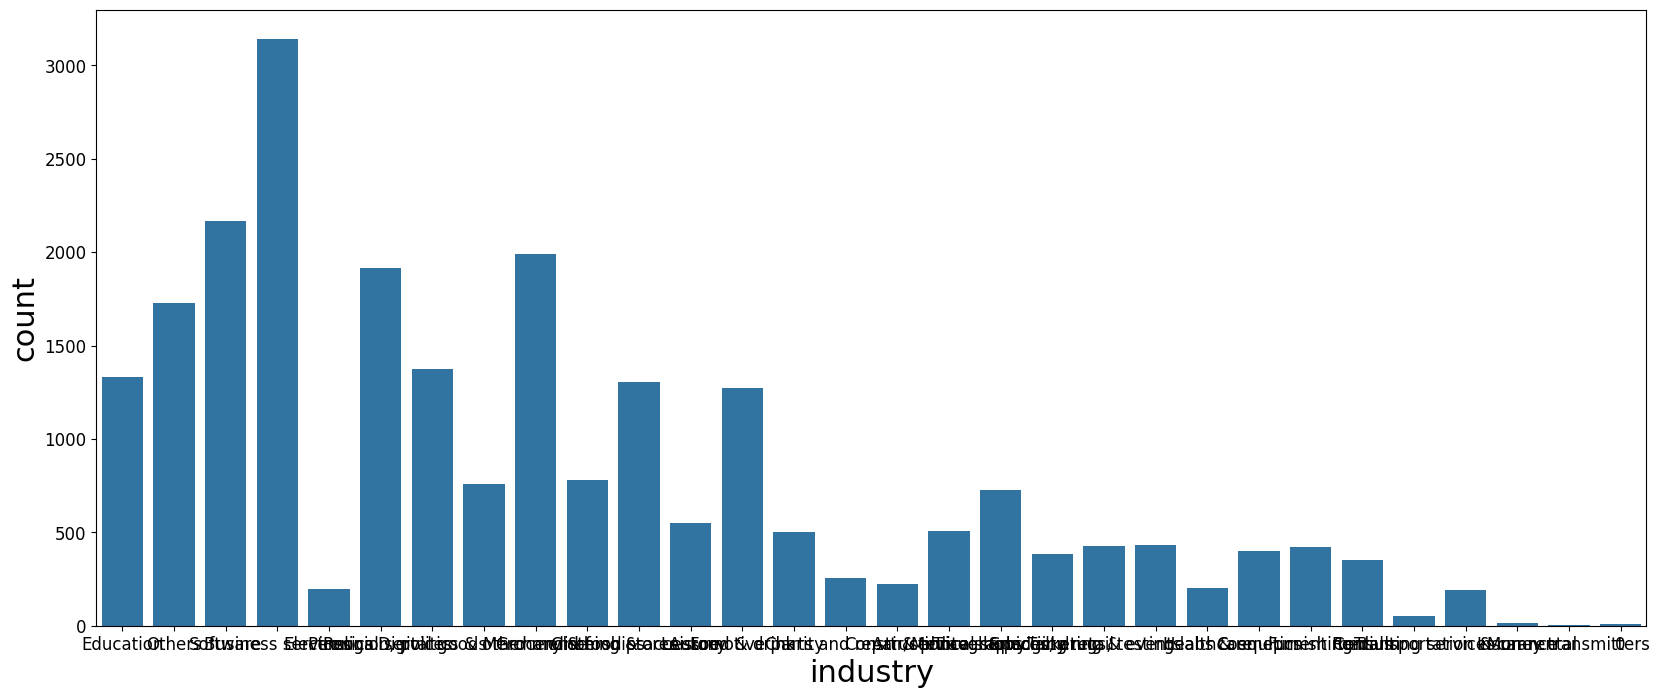

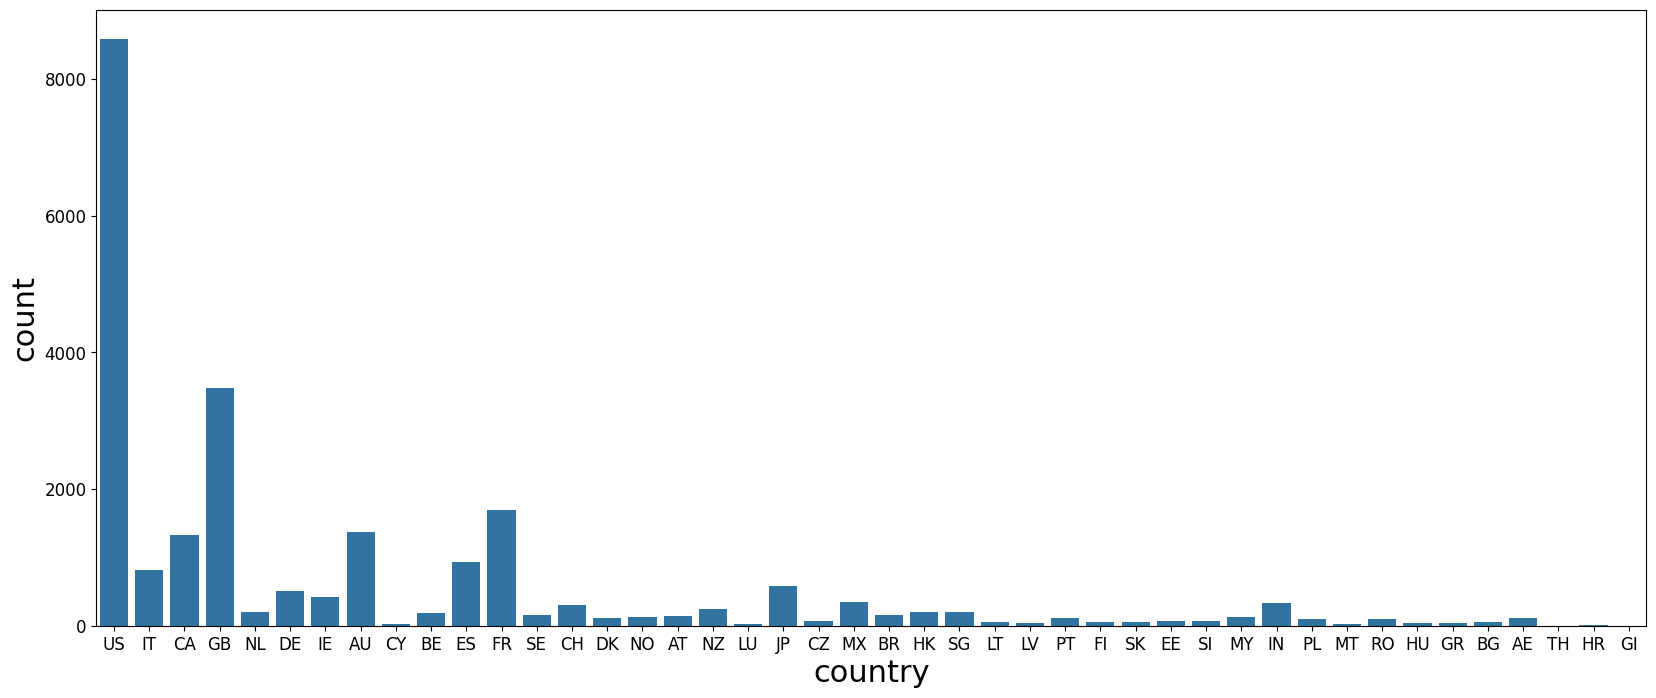

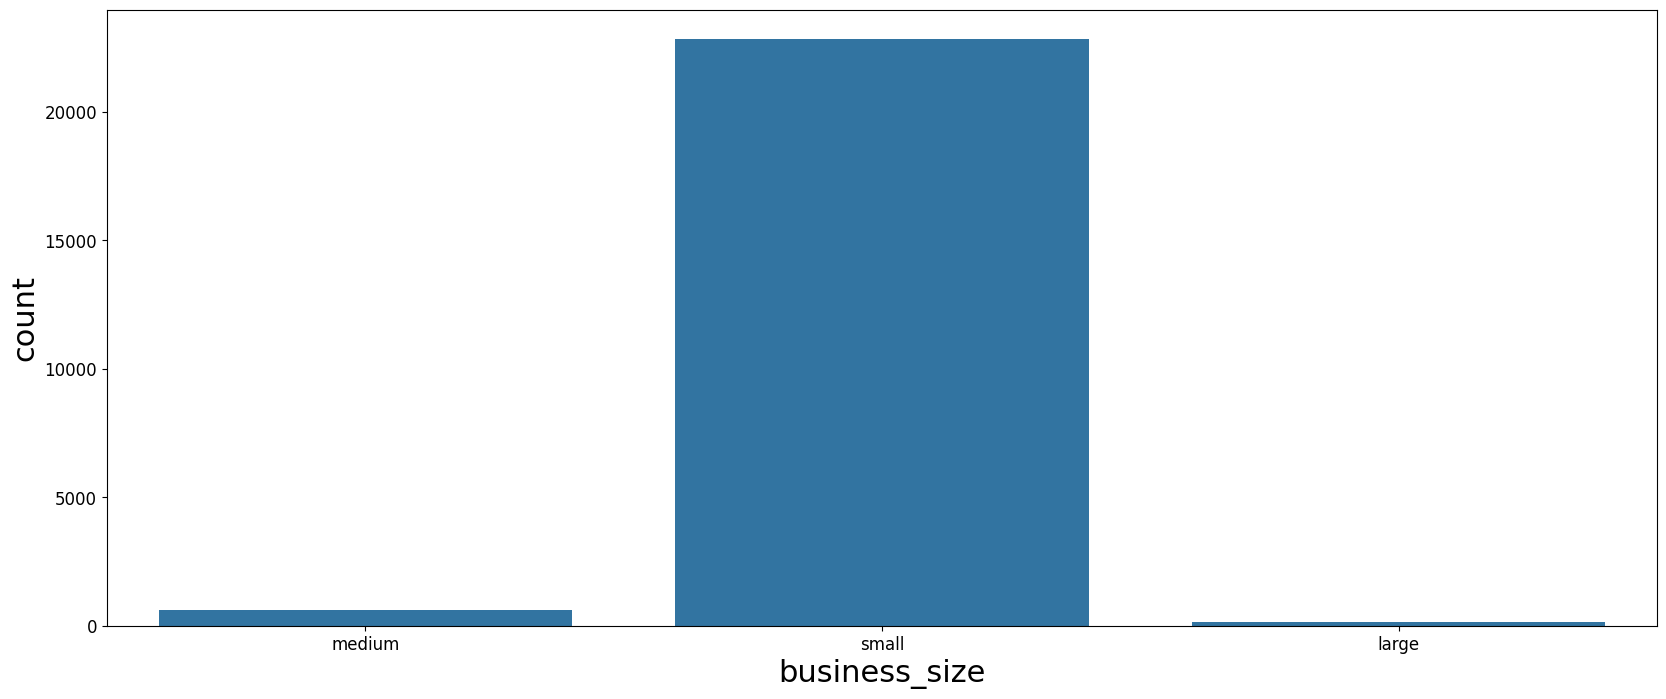

In [21]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Set the figure size to match the width of the screen
plt.rcParams['figure.figsize'] = (20, 8)

# Create countplots for categorical data
categories_merchant = ['industry', 'country', 'business_size']

for category in categories_merchant:
    sns.countplot(x=category, data=merchants_df)
    plt.show()


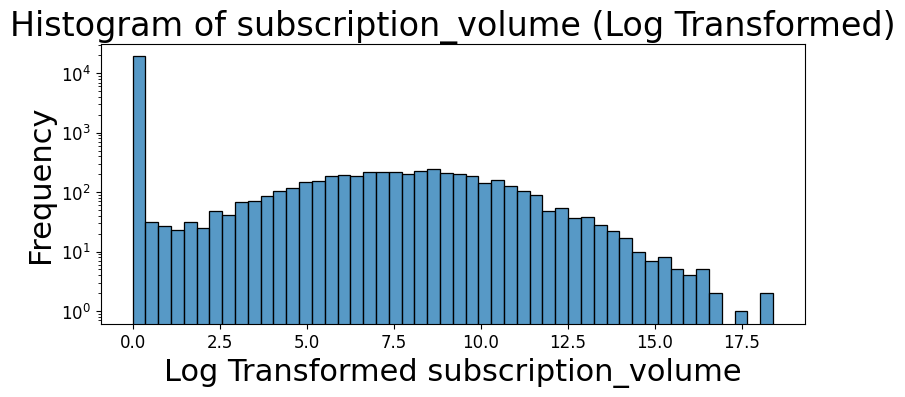

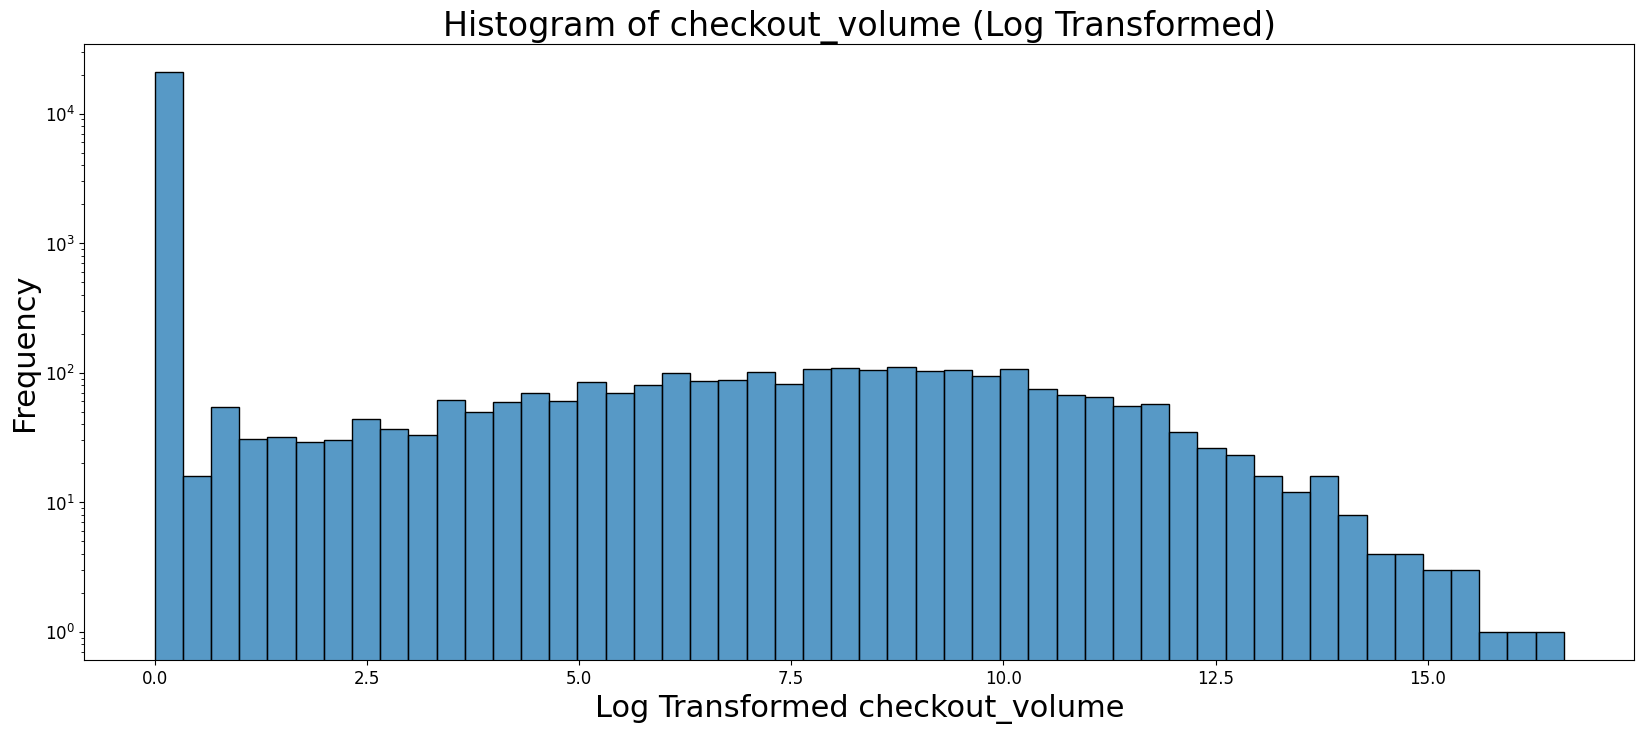

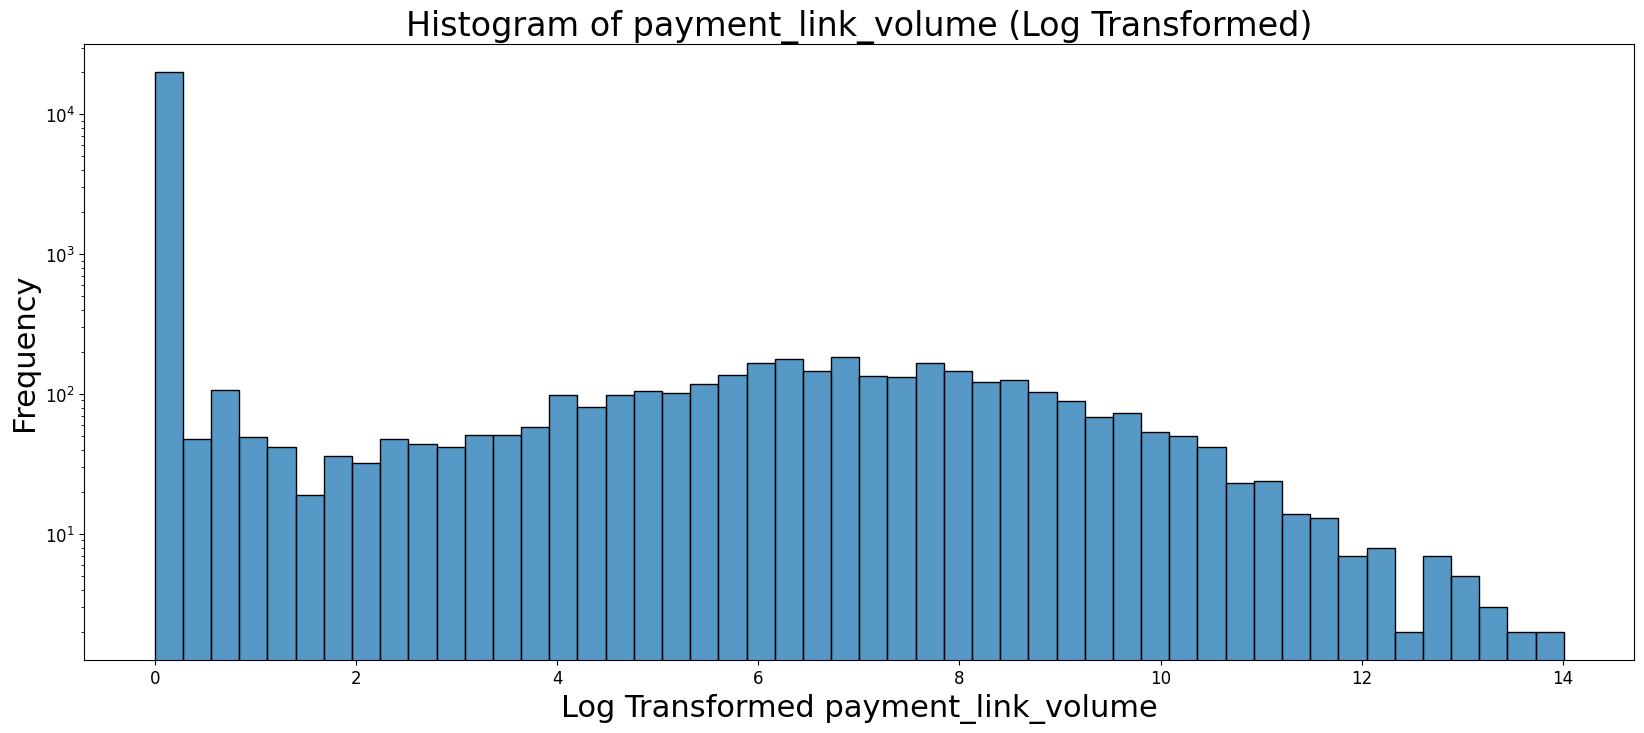

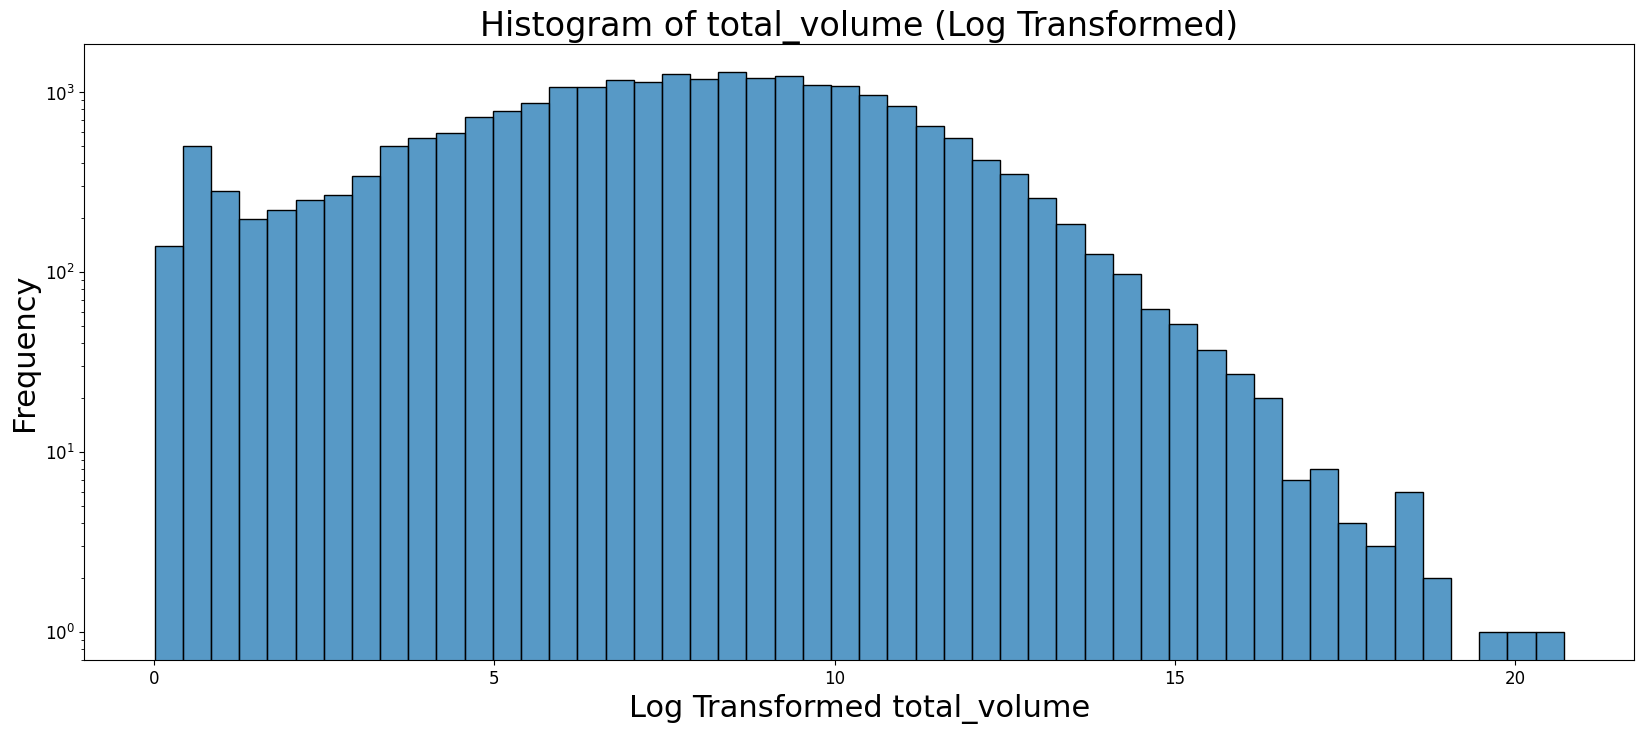

NameError: name 'p' is not defined

In [33]:
numerical_payments = ['subscription_volume', 'checkout_volume', 'payment_link_volume', 'total_volume']
plt.subplot(2, 2, 1)
for i in numerical_payments:
    log_transformed = np.log1p(payments_df.groupby('merchant').sum()[i])
    sns.histplot(log_transformed, bins=50)
    plt.title('Histogram of ' + i + ' (Log Transformed)')
    plt.xlabel('Log Transformed ' + i)
    plt.ylabel('Frequency')
    plt.yscale('log')  # Log scale for y-axis
    plt.show()

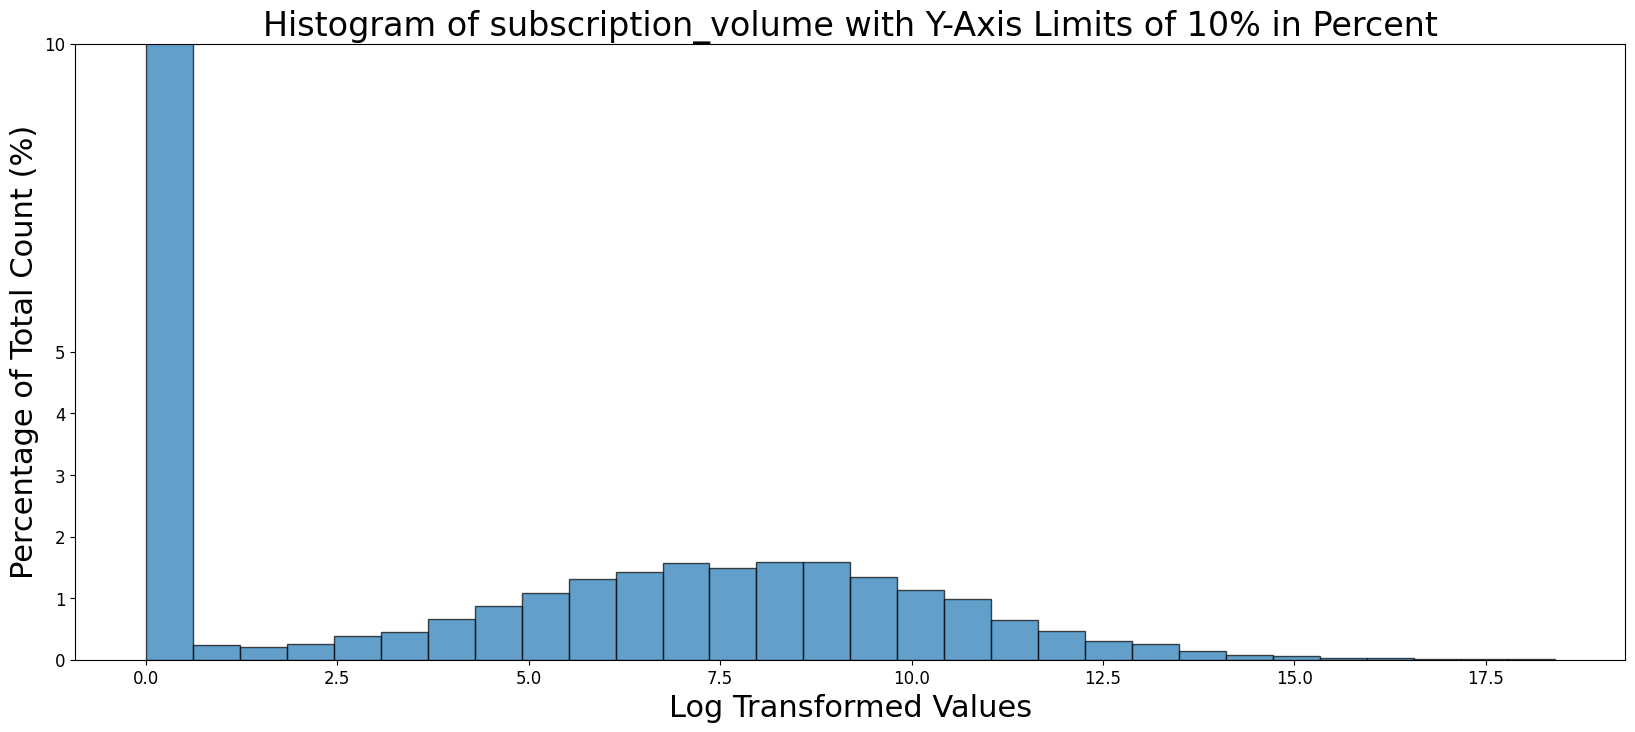

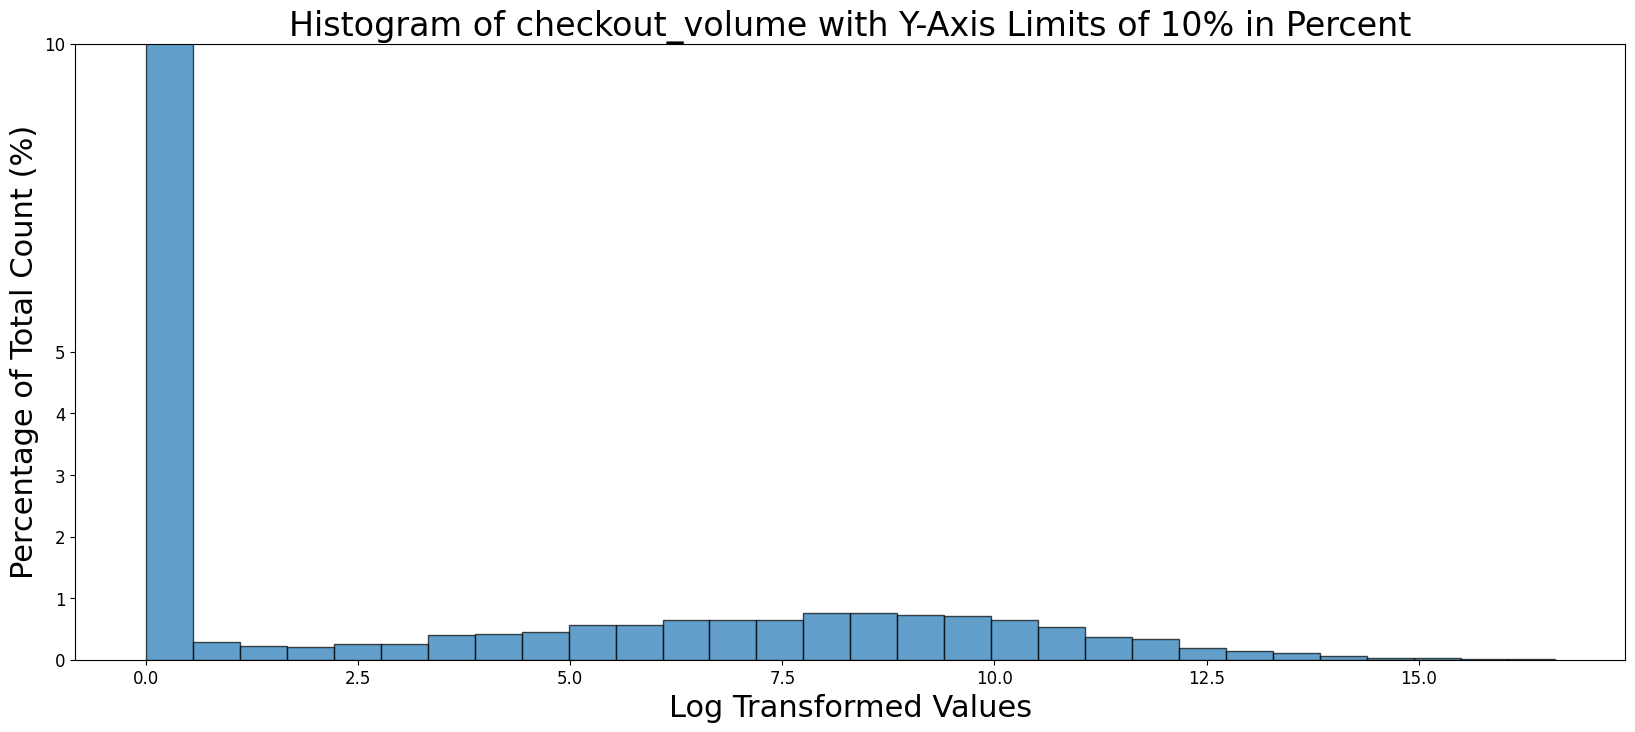

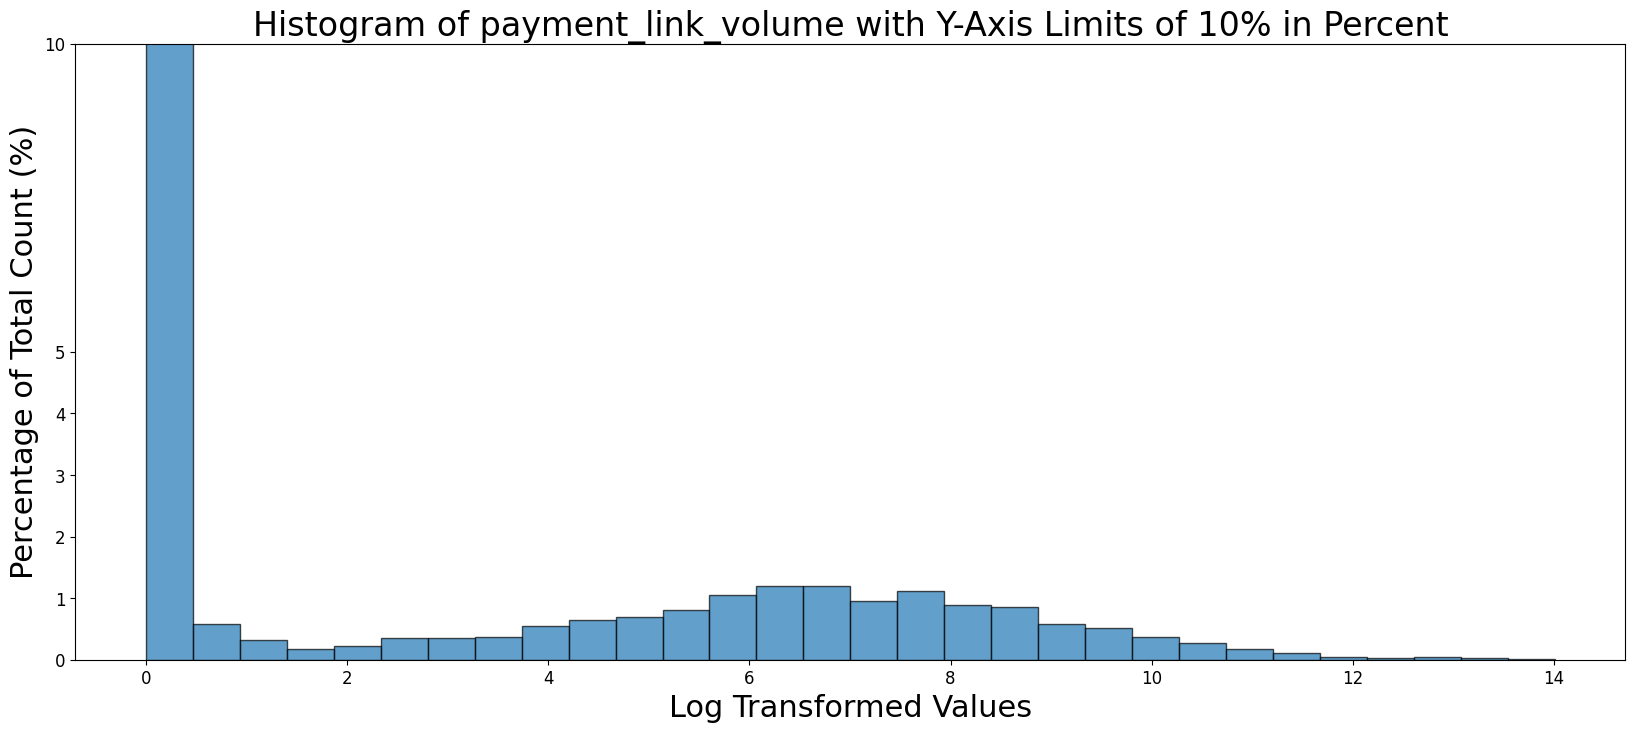

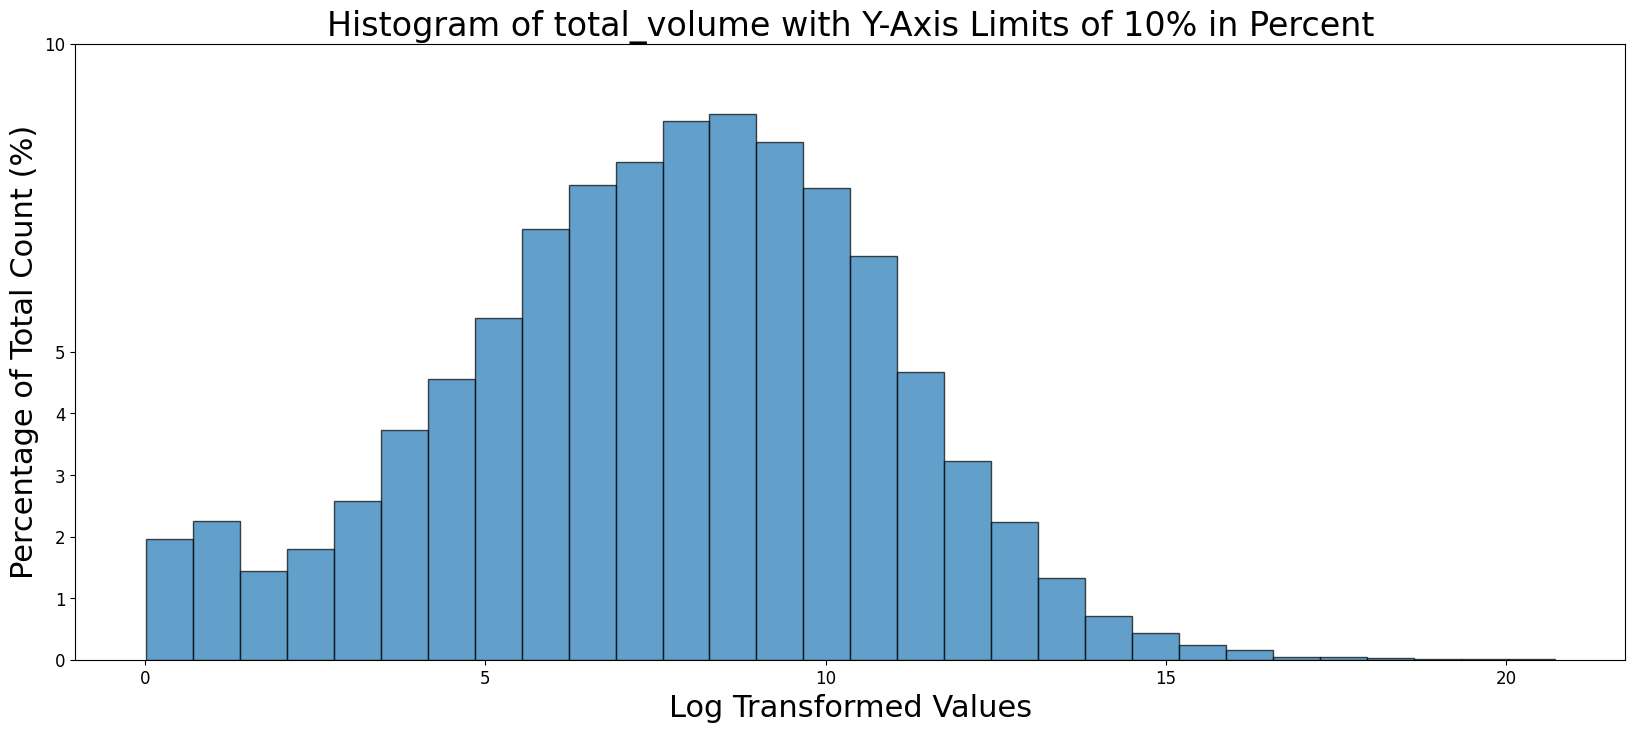

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming payments_df is defined somewhere above this code
# and 'i' is replaced with the actual column name you're interested in
for i in ['subscription_volume', 'checkout_volume', 'payment_link_volume', 'total_volume']:
    log_transformed = np.log1p(payments_df.groupby('merchant').sum()[i])

# Calculate the total count
    total_count = len(log_transformed)

# Generate histogram data and convert bin counts to percentages
    counts, bins, patches = plt.hist(log_transformed, bins=30, edgecolor='black', alpha=0.7)

# Convert counts to percentages
    percentages = (counts / total_count) * 100

# Clear the initial histogram
    plt.cla()

# Plot the histogram with percentages, but filter out the 80% data point if necessary
# This step assumes no single bar exactly at 80%, as we're not plotting such a bar
    plt.bar(bins[:-1], percentages, width=np.diff(bins), edgecolor='black', align='edge', alpha=0.7)

# Set y-axis to show 0-3%
    plt.ylim(0, 5)

# Add a custom tick mark for 80%
    plt.yticks(list(plt.yticks()[0]) + [10])

    plt.xlabel('Log Transformed Values')
    plt.ylabel('Percentage of Total Count (%)')
    plt.title('Histogram of ' + i + ' with Y-Axis Limits of 10% in Percent')

    plt.show()

In [7]:
# Missing values check
print(merchants_df.isnull().sum())
print(payments_df.isnull().sum())


merchant             0
industry             0
first_charge_date    0
country              0
business_size        0
dtype: int64
date                   0
merchant               0
subscription_volume    0
checkout_volume        0
payment_link_volume    0
total_volume           0
dtype: int64


In [52]:
# Calculate the percentage of merchants using each product
subscription_usage = payments_df[payments_df['subscription_volume'] > 0]['merchant'].nunique() / payments_df['merchant'].nunique() * 100
checkout_usage = payments_df[payments_df['checkout_volume'] > 0]['merchant'].nunique() / payments_df['merchant'].nunique() * 100
payment_link_usage = payments_df[payments_df['payment_link_volume'] > 0]['merchant'].nunique() / payments_df['merchant'].nunique() * 100


In [53]:
print('Subscription Usage: {:.2f}%'.format(subscription_usage))
print('Checkout Usage: {:.2f}%'.format(checkout_usage))
print('Payment Link Usage: {:.2f}%'.format(payment_link_usage))


Subscription Usage: 18.68%
Checkout Usage: 11.10%
Payment Link Usage: 14.78%


Lets see if any country doesn't have any subscription revenue, and there are only two countries HR and TH with very small volumes compared to the US.

In [54]:

# Load the datasets
#merchants_df = pd.read_csv('dstakehome_merchants.csv')
#payments_df = pd.read_csv('dstakehome_payments - dstakehome_payments.csv.csv')

# Convert date columns
payments_df['date'] = pd.to_datetime(payments_df['date'])

# Merge the merchants with payments to get country information
payments_merged = payments_df.merge(merchants_df[['merchant', 'country']], on='merchant', how='left')

# Identify countries with zero subscription volume
country_subscription_summary = payments_merged.groupby('country').agg({
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index()

# Filter countries with zero subscription volume
control_countries = country_subscription_summary[country_subscription_summary['subscription_volume'] == 0]

print(control_countries)


   country  subscription_volume  checkout_volume  payment_link_volume  \
20      HR                  0.0            40.38              3932.87   
42      TH                  0.0             0.00                 0.03   

    total_volume  
20      24775.03  
42         34.87  


In [55]:
country_subscription_summary_US = payments_merged[payments_merged['country']=='US'].groupby('country').agg({
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index()
print (country_subscription_summary_US)

  country  subscription_volume  checkout_volume  payment_link_volume  \
0      US         5.122579e+08      46963809.09          12277990.69   

   total_volume  
0  3.030188e+09  


In [63]:
merchants_df.columns

Index(['merchant', 'industry', 'first_charge_date', 'country',
       'business_size'],
      dtype='object')

Counry and industry distributiion of revenue volume. 

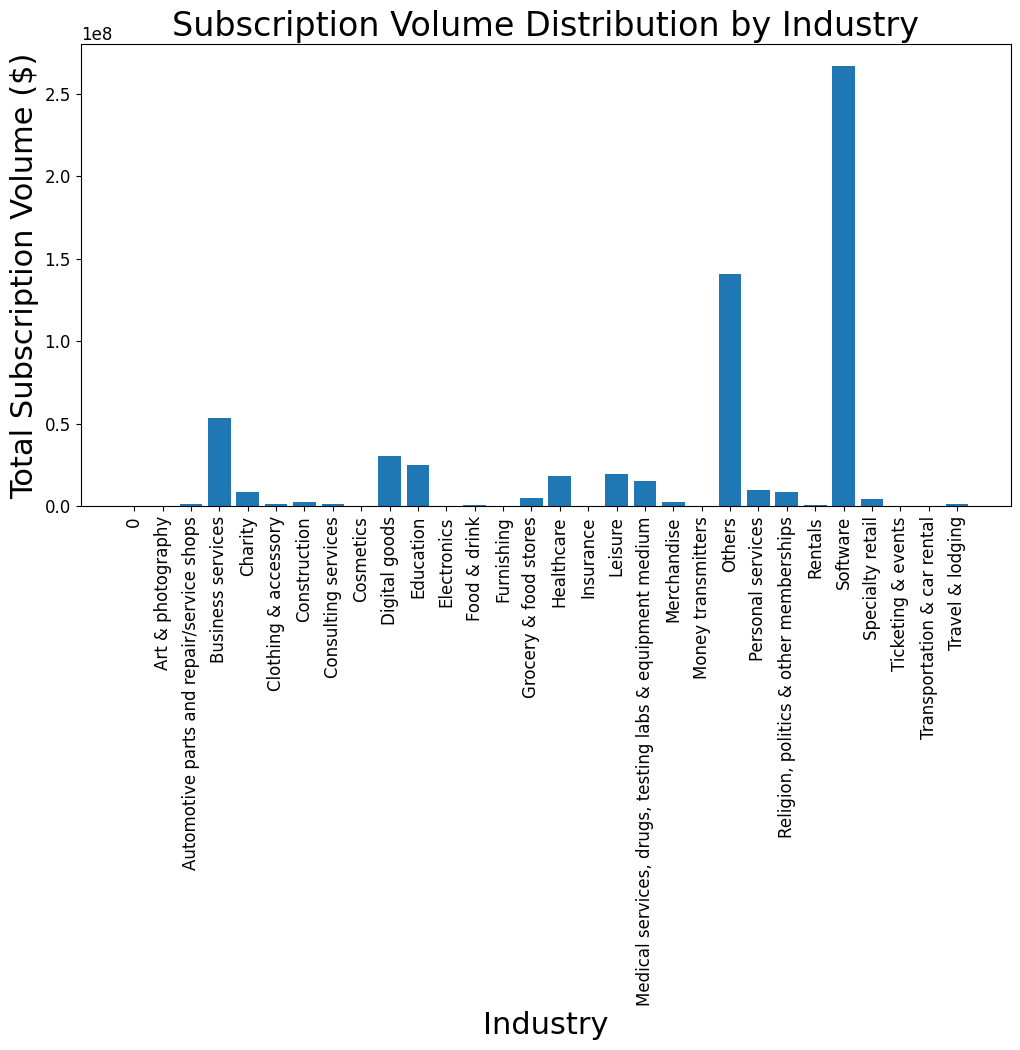

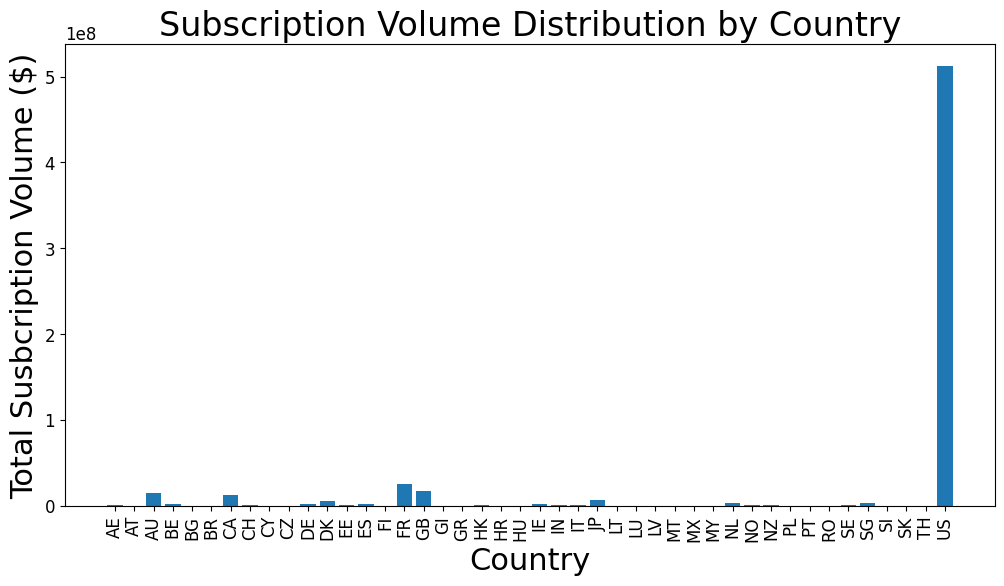

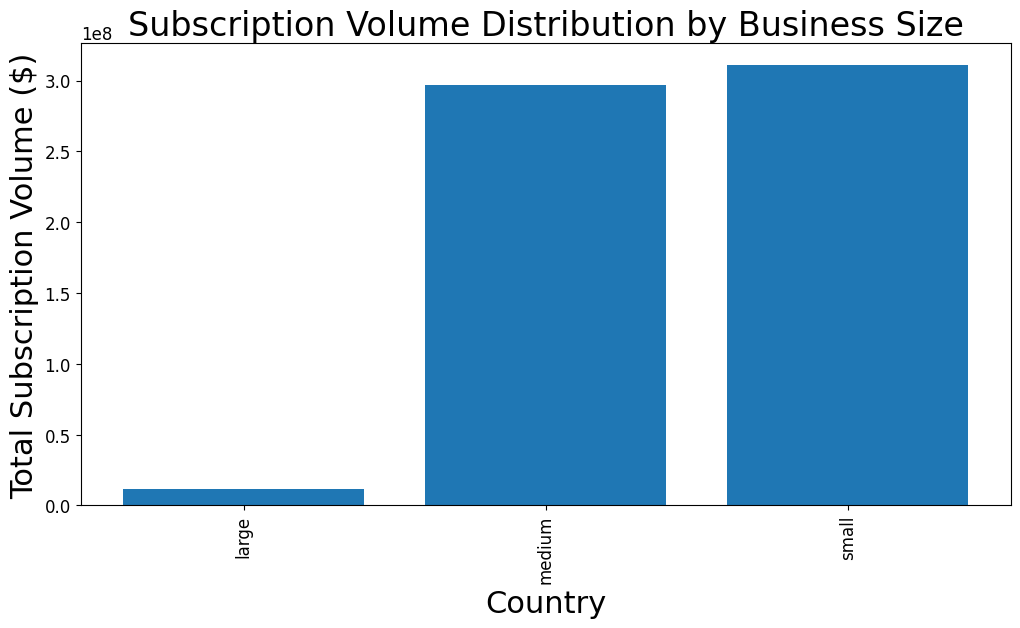

In [65]:
payments_merged = payments_df.merge(merchants_df[['merchant', 'industry','country','business_size']], on='merchant', how='left')

industry_distribution = payments_merged.groupby('industry').agg({
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(industry_distribution['industry'], industry_distribution['subscription_volume'], label='Subs Volume')
plt.xticks(rotation=90)
plt.title('Subscription Volume Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Subscription Volume ($)')
plt.show()

# Aggregate total volumes by country
country_distribution = payments_merged.groupby('country').agg({
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(country_distribution['country'], country_distribution['subscription_volume'], label='Subs Volume')
plt.xticks(rotation=90)
plt.title('Subscription Volume Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Susbcription Volume ($)')
plt.show()

country_distribution = payments_merged.groupby('business_size').agg({
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(country_distribution['business_size'], country_distribution['subscription_volume'], label='Subs Volume')
plt.xticks(rotation=90)
plt.title('Subscription Volume Distribution by Business Size')
plt.xlabel('Country')
plt.ylabel('Total Subscription Volume ($)')
plt.show()

## Segmentation Insights

Based on the segmentation of non-subscription merchants, here are some key insights:

##Industry Segmentation

Top Industries by Average Subs Volume per Merchant:

Sotware: $123K, No of merchants: 2,161

Healthcare: $92K, No. of merchants: 201

Others: $82K, No of merchants: 1,725

Total volume per Merchant:

Charity: $178,157

Automotive Parts and Repair/Service Shops: $121,295

Business Services: $112,080

These industries have high transaction volumes and may benefit significantly from adopting subscription models.

## Business Size Segmentation

Medium Businesses: 

Number of Merchants: 621

Average Subs Volume per Merchant: $478K

Large Businesses: 

Number of Merchants: 151

Average Subs Volume per Merchant: $75K 

Small Businesses:

Number of Merchants: 22,793

Average Subs Volume per Merchant: $14K

Large businesses have the highest average volume, indicating a substantial opportunity for introducing subscription models.

## Country Segmentation

Top Countries per Avergage Sub Volume per merchant: 

US: $60K , No of merchants: 8,571

Denmark (DK): $52K, No of merchants: 114 

Netherlands (NL): $19K No of merchants: 194

Top Countries by Average Total Volume per Merchant:

Austria (AT): $163,076

Australia (AU): $128,635

United Arab Emirates (AE): $36,599

These countries represent markets where subscription adoption could drive significant revenue growth.

In [68]:
# Aggregate total volumes by industry
industry_summary = payments_merged.groupby('industry').agg({
    'merchant': 'nunique',
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index().rename(columns={'merchant': 'num_merchants'})

# Calculate average volume per merchant in each industry
industry_summary['avg_volume_per_merchant'] = industry_summary['subscription_volume'] / industry_summary['num_merchants']

print(industry_summary.sort_values(by='avg_volume_per_merchant', ascending=False).head(3))


      industry  num_merchants  subscription_volume  checkout_volume  \
25    Software           2161         2.666144e+08      14362748.37   
15  Healthcare            201         1.855838e+07        330771.11   
21      Others           1725         1.408518e+08      23186380.81   

    payment_link_volume  total_volume  avg_volume_per_merchant  
25           2290081.99  6.550302e+08            123375.452656  
15             65188.99  3.331743e+07             92330.265075  
21           1443712.77  3.665928e+08             81653.244284  


In [69]:
# Aggregate total volumes by business size
business_size_summary = payments_merged.groupby('business_size').agg({
    'merchant': 'nunique',
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index().rename(columns={'merchant': 'num_merchants'})

# Calculate SUBS average volume per merchant in each business size category
business_size_summary['avg_volume_per_merchant'] = business_size_summary['subscription_volume'] / business_size_summary['num_merchants']

print(business_size_summary.sort_values(by='avg_volume_per_merchant', ascending=False).head(3))


  business_size  num_merchants  subscription_volume  checkout_volume  \
1        medium            621         2.971663e+08     2.599020e+07   
0         large            151         1.129890e+07     1.527477e+06   
2         small          22793         3.107013e+08     1.461886e+08   

   payment_link_volume  total_volume  avg_volume_per_merchant  
1           1331294.66  1.151717e+09            478528.605990  
0            271415.06  2.465493e+09             74827.123113  
2          27400890.18  1.995675e+09             13631.434491  


In [71]:
# Aggregate total volumes by country
country_summary = payments_merged.groupby('country').agg({
    'merchant': 'nunique',
    'subscription_volume': 'sum',
    'checkout_volume': 'sum',
    'payment_link_volume': 'sum',
    'total_volume': 'sum'
}).reset_index().rename(columns={'merchant': 'num_merchants'})

# Calculate average volume per merchant in each country
country_summary['avg_volume_per_merchant'] = country_summary['subscription_volume'] / country_summary['num_merchants']

print(country_summary.sort_values(by='avg_volume_per_merchant', ascending=False).head(3))


   country  num_merchants  subscription_volume  checkout_volume  \
43      US           8571         5.122579e+08      46963809.09   
11      DK            114         5.877852e+06        689448.13   
32      NL            194         3.661875e+06       1380369.97   

    payment_link_volume  total_volume  avg_volume_per_merchant  
43          12277990.69  3.030188e+09             59766.414854  
11             25069.42  8.345594e+06             51560.106842  
32            113736.81  8.390932e+06             18875.644897  
